In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\Administrator\Documents\train_data_cross-sell.csv', encoding="latin1")
df.head()
         

,ÿid,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0


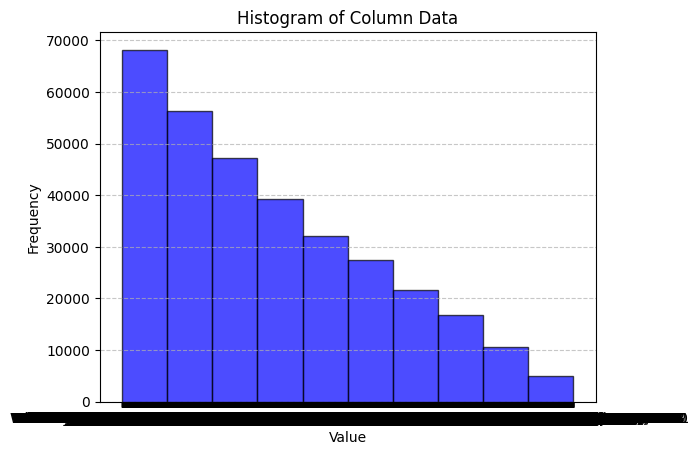

In [3]:
data_column = df['Customer_Date_of_Birth']
# extracting the column above
# now let's draw a histogram
plt.hist(data_column, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Column Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 

In [4]:
sorted_df = df.sort_values(by='Agent_name')

# Print the sorted DataFrame
print(sorted_df)

              ÿid  Gender        Customer_Date_of_Birth  Driving_License  \
60349   347359018    Male     Saturday, January 9, 1965                1   
86500   349931875  Female       Saturday, March 1, 1986                1   
87013   760803848    Male       Monday, October 1, 1973                1   
84774   576720094  Female     Monday, September 9, 1985                1   
42123   530807088  Female     Tuesday, January 23, 1979                1   
...           ...     ...                           ...              ...   
304830  522580181    Male           Friday, May 8, 1964                1   
210656  389065904    Male  Wednesday, November 27, 1968                1   
83847   703321458  Female     Monday, February 10, 1964                1   
70601   158845031    Male  Wednesday, September 6, 1967                1   
270625  281899900  Female         Sunday, April 1, 1990                1   

       Customer_Residence_Sub_County  Previously_Insured  \
60349                    NA

In [5]:
sorted_df.to_csv('sorted_data.csv')

In [6]:
df.columns

Index(['ÿid', 'Gender', 'Customer_Date_of_Birth', 'Driving_License',
       'Customer_Residence_Sub_County', 'Previously_Insured',
       'Vehicle_Year_of_Manufacture', 'Vehicle_Damage', 'Annual_Premium',
       'Agent_name', 'Life_policy_start_date', 'Response'],
      dtype='object')

In [7]:
# Access rows 0 to 1
print(df[10:20])


          ÿid  Gender        Customer_Date_of_Birth  Driving_License  \
10  647584381  Female   Wednesday, December 1, 1982                1   
11  580723304    Male  Wednesday, February 11, 1948                1   
12  637068718    Male     Wednesday, March 25, 1987                1   
13  521508229  Female    Tuesday, February 16, 1999                1   
14  352616572  Female        Sunday, March 15, 1964                1   
15  612068850    Male     Tuesday, January 27, 1959                1   
16  745653831    Male    Saturday, October 12, 1974                1   
17  173617501    Male        Sunday, April 27, 1980                1   
18  882003657  Female   Saturday, February 22, 2003                1   
19  952504061    Male      Thursday, August 7, 1997                1   

   Customer_Residence_Sub_County  Previously_Insured  \
10                 THARAKA-NITHI                   1   
11                      EMBAKASI                   0   
12                     KAMUKUNJI       

In [8]:
# Step 1: Calculate performance scores (Premium and agent name)
performance_scores = df.groupby('Agent_name')['Annual_Premium'].sum().reset_index(name='performance_score')

# Step 2: Merge the performance scores back into the original DataFrame
df = df.merge(performance_scores, on='Agent_name')

# Step 3: Define performance categories based on quartiles as an example
performance_quartiles = df['performance_score'].quantile([0.25, 0.5, 0.75]).to_dict()

